In [381]:
# Carsel and Parish 1988

using CairoMakie, ColorSchemes
import SpecialFunctions: erfc, erfcinv
using Formatting

include(raw"D:\JOE\MAIN\MODELS\AquaPore_Toolkit\src\Cst.jl")
include(raw"D:\JOE\MAIN\MODELS\AquaPore_Toolkit\src\Hydro\Wrc.jl")
include(raw"D:\JOE\MAIN\MODELS\AquaPore_Toolkit\src\Hydro\HydroRelation.jl")



Main.hydroRelation

In [382]:
				# ================================================================
				# Plotting parameters
					ColourOption_No    = 1
					Linewidth          = 2
					height             = 200
					labelsize          = 15
					textcolor          = :blue
					textsize           = 20
					titlecolor         = :navyblue
					titlesize          = 18.0
					width              = height * 3.0
					xgridstyle         = :dash
					xgridvisible       = true
					xlabelSize         = 15
					xlabelpadding      = 5
					xminortickalign    = 1.0
					xminorticksvisible = true
					xtickalign         = 0.9 # 0 is inside and 1 is outside
					xticklabelrotation = π / 4.0
					xticksize          = 10
					xticksmirrored     = false
					xtickwidt          = 0.5
					xtrimspine         = false
					ygridstyle         = :dash
					ygridvisible       = false
					ylabelpadding      = xlabelpadding
					ylabelsize         = xlabelSize
					yminortickalign    = xminortickalign
					yminorticksvisible = true
					ytickalign         = xtickalign
					yticksize          = xticksize
					yticksmirrored     = false
					ytickwidt          = xtickwidt
					ytrimspine         = false

					Markersize = 12

					ColourOption = [:glasbey_hv_n256,:seaborn_bright,:seaborn_colorblind,:seaborn_dark,:seaborn_deep,:tab10,:tableau_10,:tol_bright]

					Colormap = cgrad(colorschemes[ColourOption[ColourOption_No]], size(colorschemes[ColourOption[ColourOption_No]]), categorical=true)


In [ ]:
θs =[0.43
0.41
0.41
0.43
0.46
0.45
0.39
0.41
0.43
0.38
0.36
0.38]

θr =[0.040000587
0.052015954
0.060514159
0.081839568
0.072650556
0.093697453
0.104725023
0.121582641
0.137096464
0.102554262
0.164050547
0.143041418]

Ks = [0.0825
0.040532407
0.012280093
0.002888889
0.000694444
0.001201389
0.003638889
0.000722222
0.000194444
0.000333333
5.56E-05
0.000555556]

Ψm = [100
127.1514065
319.2419123
1107.554381
3571.676601
2577.085214
1060.359189
5201.720212
14943.92119
14081.66764
166923.1213
173182.1584]

σ = [0.767528364
0.84759782
1.154454689
1.56910817
1.959401769
1.850609728
1.554592632
2.084719856
2.436491598
2.416681323
3.24090118
3.253171388]


θsMacMat =[0.43
0.41
0.41
0.43
0.46
0.45
0.39
0.41
0.43
0.38
0.36
0.38]

ΨmMac =[0.7675
0.7675
0.7675
0.7675
0.7675
0.7675
0.7675
0.7675
0.7675
0.7675
0.7675
0.7675]

ΨmMac =[10
10
10
10
10
10
10
10
10
10
10
10]

Ks =[0.0825
0.040532407
0.012280093
0.002888889
0.000694444
0.001201389
0.003638889
0.000722222
0.000194444
0.000333333
5.56E-05
0.000555556]


Id = ["Sand"
"Loamy sand"
"Sandy loam"
"Loam"
"Silt"
"Silt loam"
"Sandy clay loam"
"Clay loam"
"Silty clay loam"
"Sandy clay"
"Silty clay"
"Clay"]


12-element Vector{String}:
 "Sand"
 "Loamy sand"
 "Sandy loam"
 "Loam"
 "Silt"
 "Silt loam"
 "Sandy clay loam"
 "Clay loam"
 "Silty clay loam"
 "Sandy clay"
 "Silty clay"
 "Clay"

In [384]:

#  For every ψ
	Ψ_Min_Log = log10(0.0001)
	Ψ_Max_Log = log10(3000_00.0)
	Ψ_Sim = 10.0.^(collect(Ψ_Min_Log:0.001:Ψ_Max_Log))
	N_Ψ  = length(Ψ_Sim)

	θ_Sim    = zeros(N_Ψ, 12)
	∂θ∂Ψ_Sim = zeros(N_Ψ, 12)


for iCarsel=1:12

	Ψm = √(ΨmacMat) * exp(σ[iCarsel] * 3.0)

	for iΨ = 1:N_Ψ
		θ_Sim[iΨ, iCarsel] = wrc.kg.Ψ_2_θ(;Ψ₁=Ψ_Sim[iΨ], θs=θs[iCarsel], θsMacMat=θsMacMat[iCarsel], θr=θr[iCarsel], Ψm=Ψm, σ=σ[iCarsel], ΨmMac=100.0, ΨmacMat=10.0, σMac=1.1, KosugiModel_θΨ⍰="Traditional", ΨmacMat_2_σMac_ΨmMac=false, Pσ_Mac=2.0)
	end
end


In [385]:
for iCarsel=1:12
	for iΨ = 1:N_Ψ
		∂θ∂Ψ_Sim[iΨ, iCarsel] = wrc.kg.∂θ∂Ψ_NORM(;Ψ₁=Ψ_Sim[iΨ], θs=θs[iCarsel], θsMacMat=θsMacMat[iCarsel], θr=θr[iCarsel], Ψm=Ψm, σ=σ[iCarsel], ΨmMac=100.0, ΨmacMat=10.0, σMac=1.1, KosugiModel_θΨ⍰="Traditional", ΨmacMat_2_σMac_ΨmMac=false)
	end
end



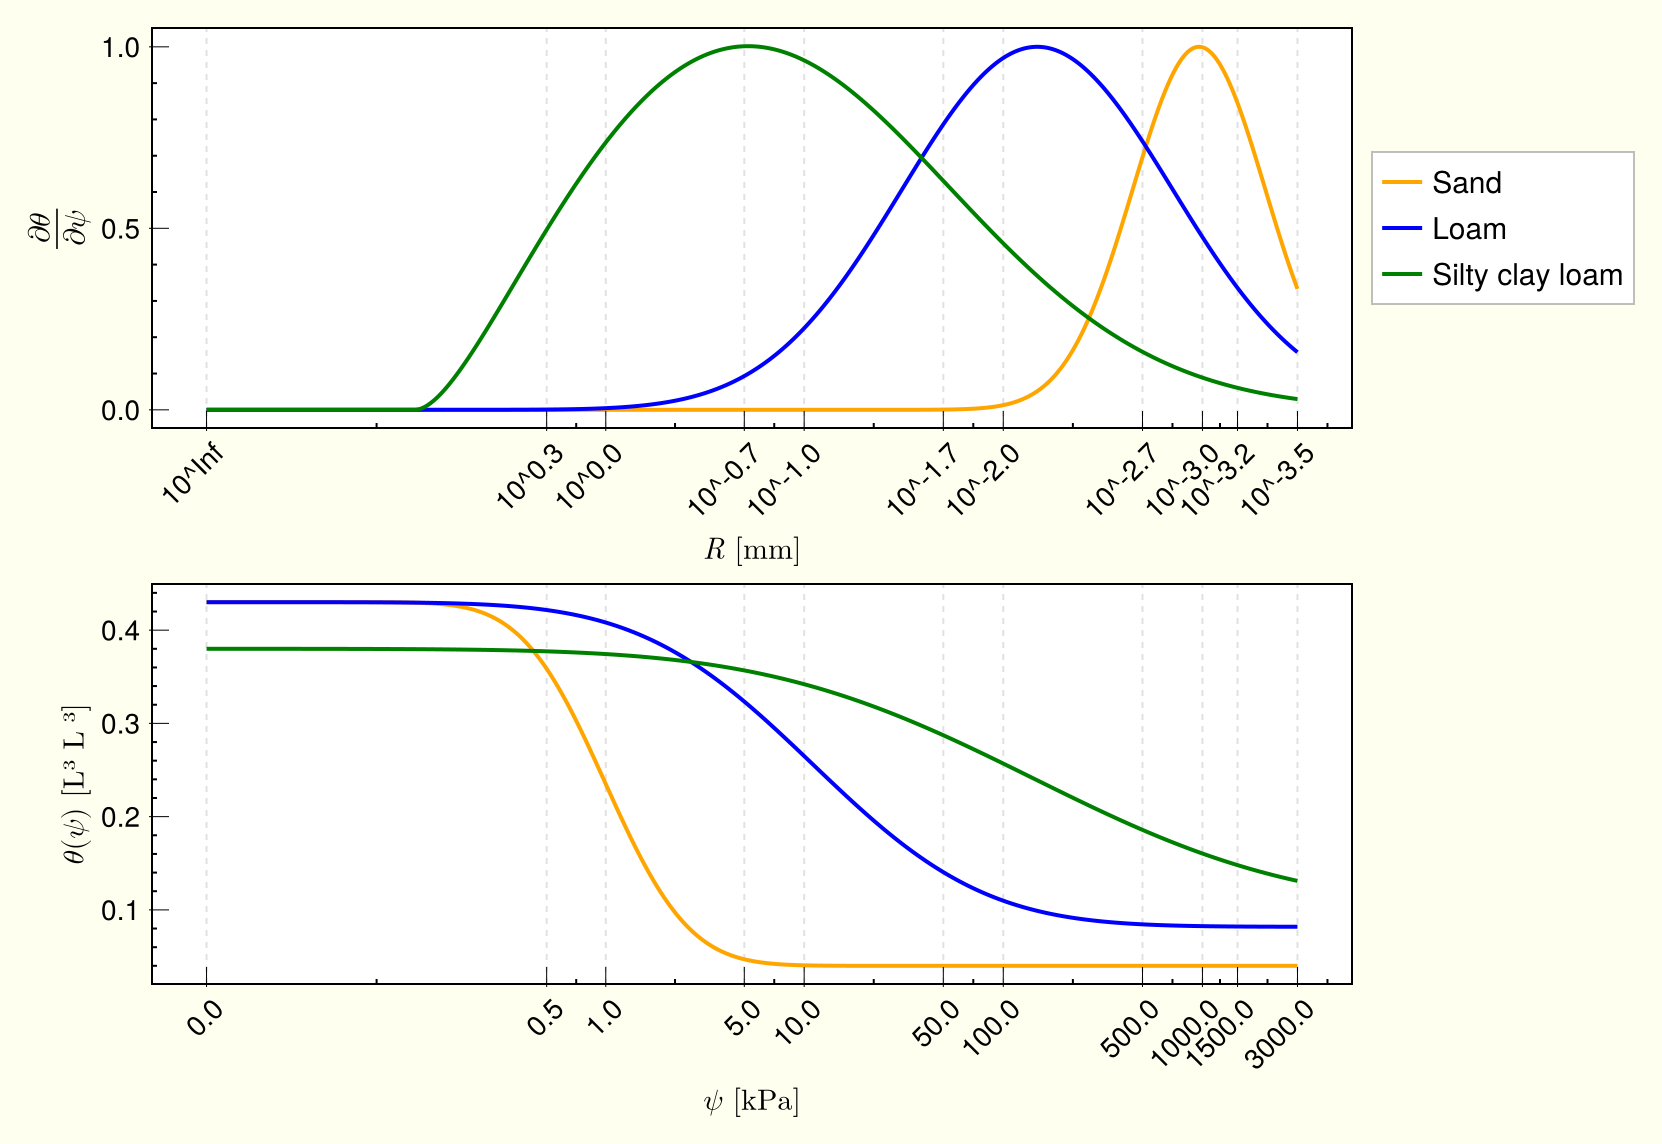

CairoMakie.Screen{IMAGE}


In [395]:

Ψticks = [0, 50, 100, 500, 1000,5000,100_00, 500_00, 1000_00, 1500_00, 3000_00] # mm

	Ψ_Log = Array{Float64}(undef, N_Ψ)
	for iZ=1:N_Ψ
		Ψ_Log[iZ] = log1p(Ψ_Sim[iZ])
	end

# Starting to plot
	CairoMakie.activate!(type="svg", pt_per_unit=1)
	Fig =  Figure(figure_padding = 10; fonts = ( ; regular="CMU Serif"), backgroundcolor = :ivory)



Axis_∂θ∂Ψ= Axis(Fig[1, 1], xlabel= L"$R$ [mm]", ylabel=L"\frac{\partial \theta}{\partial \psi}" ,  titlecolor=titlecolor, xticklabelrotation=xticklabelrotation, ylabelsize=ylabelsize, xlabelsize=xlabelSize, xticksize=xticksize, yticksize=yticksize, width=width, height=height, titlesize=titlesize,  xgridvisible=xgridvisible, ygridvisible=ygridvisible, xminorticksvisible=xminorticksvisible, yminorticksvisible=yminorticksvisible, xtickwidth=xtickwidt, ytickwidth=ytickwidt, xtickalign=xtickalign, ytickalign=ytickalign, xticksmirrored=xticksmirrored, yticksmirrored=yticksmirrored, xtrimspine=xtrimspine,  ytrimspine=ytrimspine, xgridstyle=xgridstyle, ygridstyle=ygridstyle, yminorticks=IntervalsBetween(5), xlabelpadding=xlabelpadding, ylabelpadding=ylabelpadding, xminortickalign=xminortickalign, yminortickalign=yminortickalign,  titlefont = "CMU Serif")

 	R = floor.(log10.(inv.(cst.Mm_2_kPa .* Ψticks)), digits=1)
	Axis_∂θ∂Ψ.xticks = (log1p.(Ψticks), "10^" .* string.( R))


lines!(Axis_∂θ∂Ψ, Ψ_Log, ∂θ∂Ψ_Sim[:, 1], linewidth=Linewidth, color=:orange, label= Id[1])
lines!(Axis_∂θ∂Ψ, Ψ_Log, ∂θ∂Ψ_Sim[:, 4], linewidth=Linewidth, color=:blue, label=Id[4])
lines!(Axis_∂θ∂Ψ, Ψ_Log, ∂θ∂Ψ_Sim[:, 9], linewidth=Linewidth, color=:green, label=Id[9])

Axis_θψ = Axis(Fig[2, 1], xlabel= L"$ψ$ [kPa]" , ylabel=L"$\theta(\psi)$ [L³ L⁻³]",  titlecolor=titlecolor, xticklabelrotation=xticklabelrotation, ylabelsize=ylabelsize, xlabelsize=xlabelSize, xticksize=xticksize, yticksize=yticksize, width=width, height=height, titlesize=titlesize,  xgridvisible=xgridvisible, ygridvisible=ygridvisible, xminorticksvisible=xminorticksvisible, yminorticksvisible=yminorticksvisible, xtickwidth=xtickwidt, ytickwidth=ytickwidt, xtickalign=xtickalign, ytickalign=ytickalign, xticksmirrored=xticksmirrored, yticksmirrored=yticksmirrored, xtrimspine=xtrimspine,  ytrimspine=ytrimspine, xgridstyle=xgridstyle, ygridstyle=ygridstyle, yminorticks=IntervalsBetween(5), xlabelpadding=xlabelpadding, ylabelpadding=ylabelpadding, xminortickalign=xminortickalign, yminortickalign=yminortickalign,  titlefont = "CMU Serif")

	Axis_θψ.xticks = (log1p.(Ψticks), string.(cst.Mm_2_kPa .* Ψticks))

	# hidexdecorations!(Axis_θψ, ticks=false, grid=false)

lines!(Axis_θψ, Ψ_Log, θ_Sim[:, 1], linewidth=Linewidth, color=:orange, label= Id[1] )
lines!(Axis_θψ, Ψ_Log, θ_Sim[:, 4], linewidth=Linewidth, color=:blue, label=Id[4])
lines!(Axis_θψ, Ψ_Log, θ_Sim[:, 10], linewidth=Linewidth, color=:green, label=Id[9])
# text!(log1p(hydro.ΨmacMat[iZ]), 0, text =L"ψ_{macMat}", align=(:left,:bottom), rotation = π/2,  color=textcolor, fontsize=textsize)


# General
Legend(Fig[1,2], Axis_∂θ∂Ψ, framecolor=(:grey, 0.5), labelsize=labelsize, padding=5, tellheight=true, tellwidt=true, nbanks=1, backgroundcolor=:gray100)
	resize_to_layout!(Fig)
	trim!(Fig.layout)
	colgap!(Fig.layout, 10)
	rowgap!(Fig.layout, 10)

	display(Fig)
